# Text Processing

For this notebook i'm stating to do Text Processing and change my data base.

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from wordcloud import WordCloud
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
import text2emotion as t2e
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from datetime import datetime
from datetime import date, timedelta
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [286]:
# Adding my dataset Corona_NLP_test
df = pd.read_csv('Corona_NLP_test.csv')

In [287]:
#description of the data set
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [288]:
df.shape

(3798, 6)

In [289]:
stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub("@\S+", " ", text)
    # remove url
    text = re.sub("https*\S+", " ", text)
    # remove hashtags
    text = re.sub("#\S+", " ", text)
    # remove all numbers
    text = re.sub("\d", " ", text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    # stopwords     
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [290]:
#Here I'm uplaing my remove processe
df.OriginalTweet=df.OriginalTweet.apply(clean_text)

In [291]:
#Now, you can see after remove all unnessey words from tweets
df['OriginalTweet']

0       trending new yorkers encounter empty supermark...
1       find hand sanitizer fred meyer turned pack pur...
2                                find protect loved ones 
3        buying hits city anxious shoppers stock food ...
4        one week everyone buying baby milk powder nex...
                              ...                        
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot non perishable items echo needs ...
3795    asst prof economics talking recent research co...
3796    gov need somethings instead biar je rakyat ass...
3797    members committed safety employees end users m...
Name: OriginalTweet, Length: 3798, dtype: object

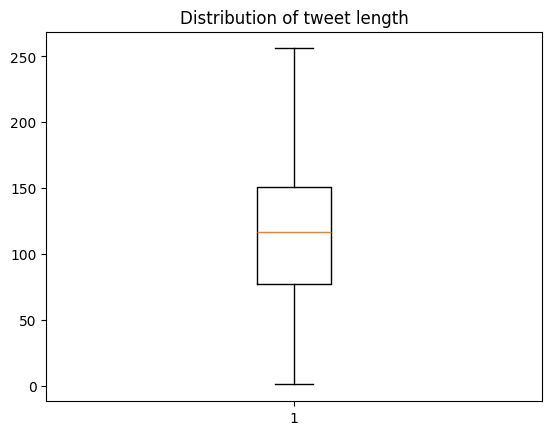

In [292]:
# Tweets anormalement longs/courts
# You see in data processing we have tweets length around 350, but after removing unnecessary words you can see tweets length is around 250+
df['tweet_length'] = df['OriginalTweet'].apply(len)
plt.boxplot(df['tweet_length'])
plt.title("Distribution of tweet length")
plt.show()

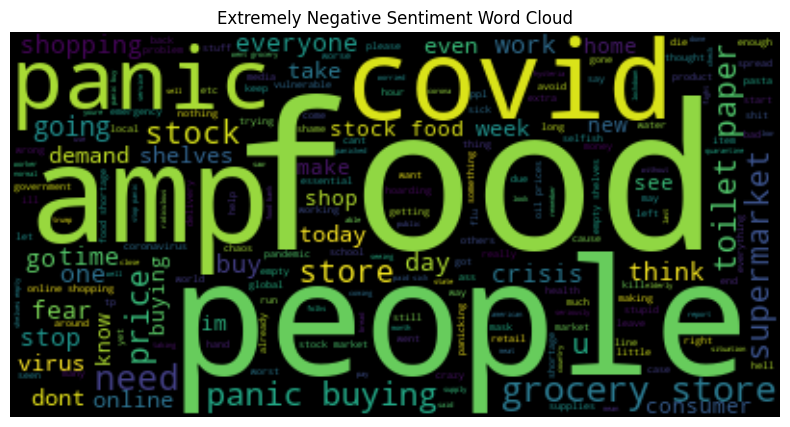

In [293]:
# This plot to see most word use in tweets Extremely Negative
Extre_negative_text = ' '.join(df[df.Sentiment == 'Extremely Negative'].OriginalTweet.tolist())
Extre_negative_wordcloud = WordCloud().generate(Extre_negative_text)
plt.figure(figsize=(8, 8))

# Extremely Negative Word Cloud
plt.subplot()
plt.imshow(Extre_negative_wordcloud, interpolation='bilinear')
plt.title('Extremely Negative Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()


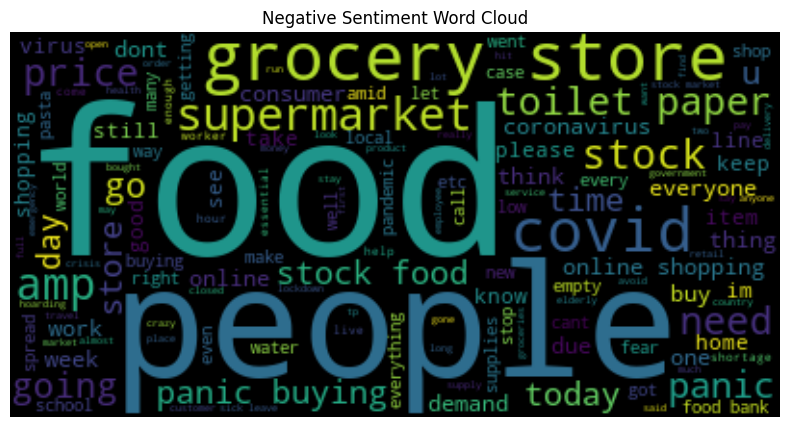

In [294]:
# This plot to see most word use in tweets Negative
negative_text = ' '.join(df[df.Sentiment == 'Negative'].OriginalTweet.tolist())
negative_wordcloud = WordCloud().generate(negative_text)
plt.figure(figsize=(8, 8))

# Negative Word Cloud
plt.subplot()
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

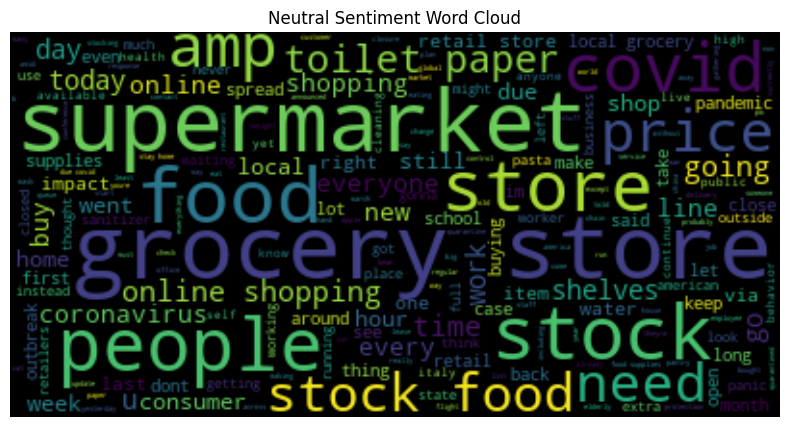

In [295]:
# This plot to see most word use in tweets Neutral
neutral_text = ' '.join(df[df.Sentiment == 'Neutral'].OriginalTweet.tolist())
neutral_wordcloud = WordCloud().generate(neutral_text)
plt.figure(figsize=(8, 8))

# Neutral Word Cloud
plt.subplot()
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

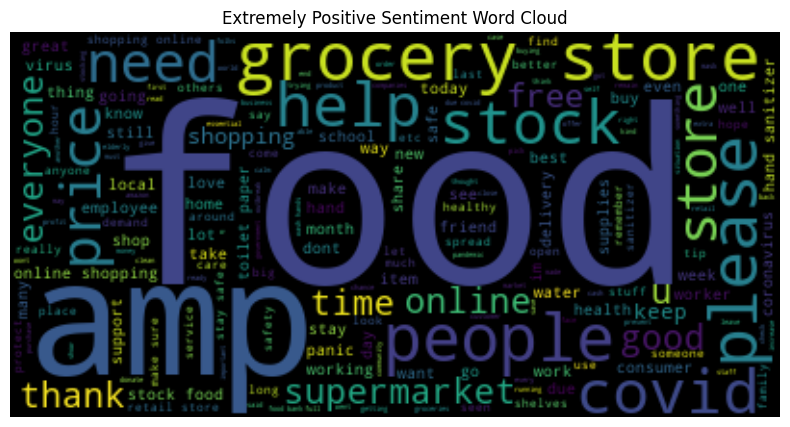

In [296]:
# This plot to see most word use in tweets Extremely Positive
Extre_positive_text = ' '.join(df[df.Sentiment == 'Extremely Positive'].OriginalTweet.tolist())
Extre_positive_wordcloud = WordCloud().generate(Extre_positive_text)
plt.figure(figsize=(8, 8))

# Extremely Positive Word Cloud
plt.subplot()
plt.imshow(Extre_positive_wordcloud, interpolation='bilinear')
plt.title('Extremely Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

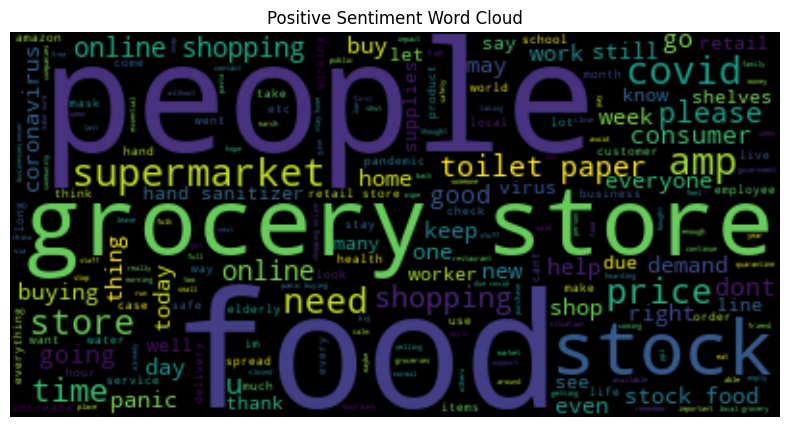

In [297]:
# This plot to see most word use in tweets Positive
positive_text = ' '.join(df[df.Sentiment == 'Positive'].OriginalTweet.tolist())
positive_wordcloud = WordCloud().generate(positive_text)
plt.figure(figsize=(8, 8))

# Positive Word Cloud
plt.subplot()
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

# After analyzing 5 categories, there was no big difference, so I decided to change the label from Extremely Negative and Extremely Positive to Negative and Positive.

In [298]:
#There are 5 categories in the dataset. I can simplify the opinion analysis to 3 categories: Positive, Negative and Neutral.


def change_labels(label):
    if label == 'Extremely Negative':
        new_label = 'Negative'
    elif label == 'Extremely Positive':
        new_label = 'Positive'
    else:
        new_label = label
    return new_label

df['Sentiment'] = df['Sentiment'].apply(change_labels)
New_df = df['Sentiment']
New_df.unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [299]:
#You can see now there is only Positive, Negative and Neutral Tweets
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_length
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,Negative,139
1,2,44954,"Seattle, WA",02-03-2020,find hand sanitizer fred meyer turned pack pur...,Positive,80
2,3,44955,NaN,02-03-2020,find protect loved ones,Positive,24
3,4,44956,Chicagoland,02-03-2020,buying hits city anxious shoppers stock food ...,Negative,116
4,5,44957,"Melbourne, Victoria",03-03-2020,one week everyone buying baby milk powder nex...,Neutral,77


In [300]:
#Here I'm trying to decaterate my TweetAt with date format

df['TweetAt'] = pd.to_datetime(df['TweetAt'], format = '%d-%m-%Y')
df['TweetAt'].min(), df['TweetAt'].max()

(Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-16 00:00:00'))

C:\Users\patel\AppData\Local\Temp\ipykernel_5364\3702224982.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='TweetAt', y='counts', data=tweets_per_day, edgecolor='black', ci=False, palette='Blues_r')
C:\Users\patel\AppData\Local\Temp\ipykernel_5364\3702224982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TweetAt', y='counts', data=tweets_per_day, edgecolor='black', ci=False, palette='Blues_r')


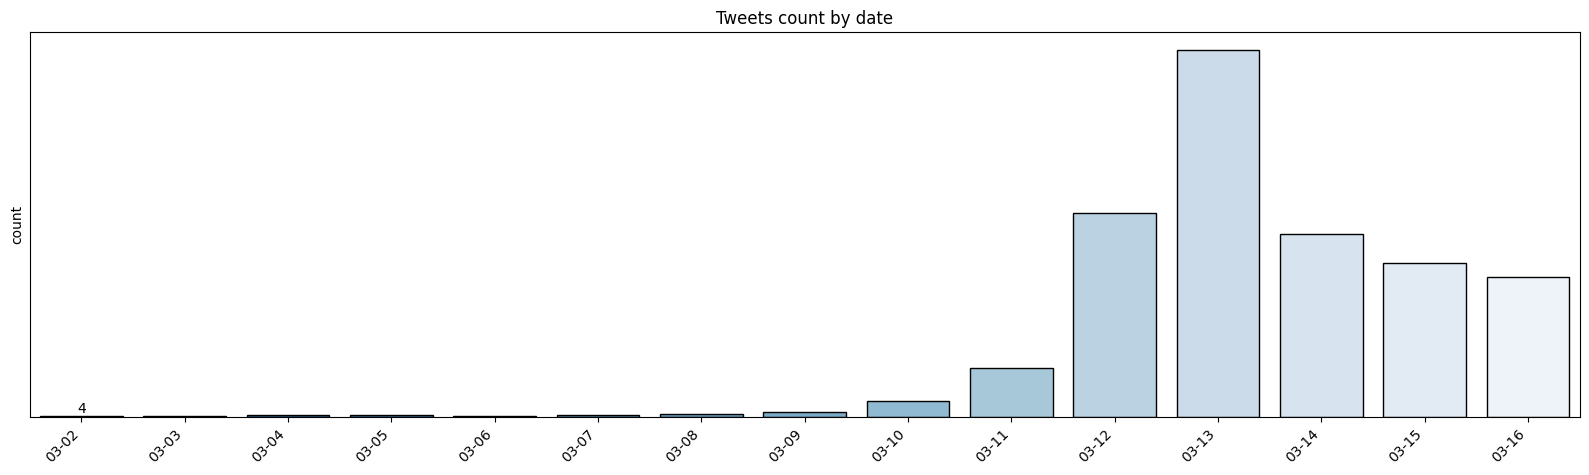

In [301]:
#Here I'm trying to plot the number of tweets post on each date (like today maybe 10 tweets post)

tweets_per_day = df['TweetAt'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='TweetAt', y='counts', data=tweets_per_day, edgecolor='black', ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [302]:
text_len = []
for text in df.OriginalTweet:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [303]:
df['text_len'] = text_len

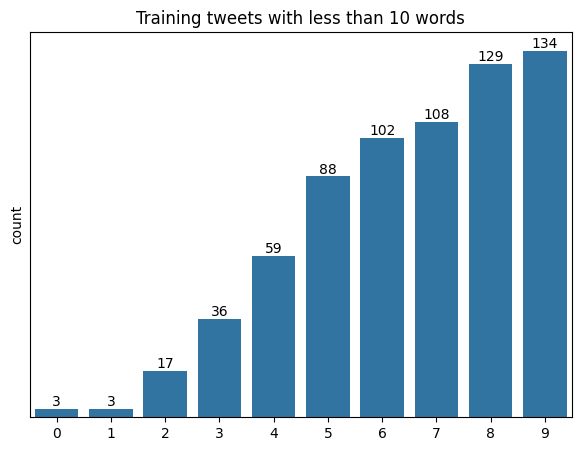

In [304]:
# Here I plot tweets less then 10 words
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], legend=False)
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()